In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_tree
import pickle

In [2]:
results = pd.read_csv('test-log.csv')

In [3]:
results

,prune_v0,prune_v1,prune_v2,prune_v3,prune_v4,prune_v5,prune_v6,prune_v7,prune_v8,prune_v9,prune_v10,prune_v11,mean_class_acc
0,0.28,0.22,0.34,0.50,0.70,0.04,0.12,0.44,0.28,0.34,0.22,0.26,0.881212
1,0.48,0.62,0.48,0.90,0.44,0.50,0.18,0.62,0.68,0.40,0.88,0.74,0.813939
2,0.46,0.34,0.16,0.58,0.74,0.58,0.60,0.28,0.16,0.28,0.70,0.72,0.852424
3,0.24,0.24,0.24,0.80,0.94,0.48,0.30,0.56,0.64,0.98,0.70,0.60,0.833636
4,0.66,0.12,0.28,0.34,0.20,0.82,0.76,0.60,0.74,0.34,0.08,0.94,0.823636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15660,1.00,0.42,0.16,0.74,0.48,0.02,0.46,0.44,0.96,0.74,0.90,0.94,0.125455
15661,0.72,1.00,0.52,0.52,0.18,0.92,0.18,0.38,0.10,0.58,0.84,0.34,0.166970
15662,0.68,0.92,0.00,0.24,0.46,0.48,0.86,0.22,0.90,0.14,0.12,0.34,0.863636
15663,0.18,0.14,0.78,0.86,0.36,0.66,0.86,0.50,0.82,0.06,0.12,0.44,0.862727


In [4]:
for view in range(0, 12):
    print(f"View {view} mean: {results[f'prune_v{view}'].mean()}")

View 0 mean: 0.49828534950526654
View 1 mean: 0.49930290456431536
View 2 mean: 0.49581359719119056
View 3 mean: 0.4967239067985956
View 4 mean: 0.5048873284391956
View 5 mean: 0.49876157037982766
View 6 mean: 0.5005055857006064
View 7 mean: 0.5015014363230131
View 8 mean: 0.5018167890201085
View 9 mean: 0.5012754548356207
View 10 mean: 0.5038697733801468
View 11 mean: 0.5044864347270986


In [5]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(15665, 12), (15665,)], [(12532, 12), (12532,)], [(3133, 12), (3133,)])

In [7]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [8]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

R² Score: 0.961815810528136
MSE: 0.002993009257734395
Accuracy: 96.18%


In [12]:
importance = model.feature_importances_

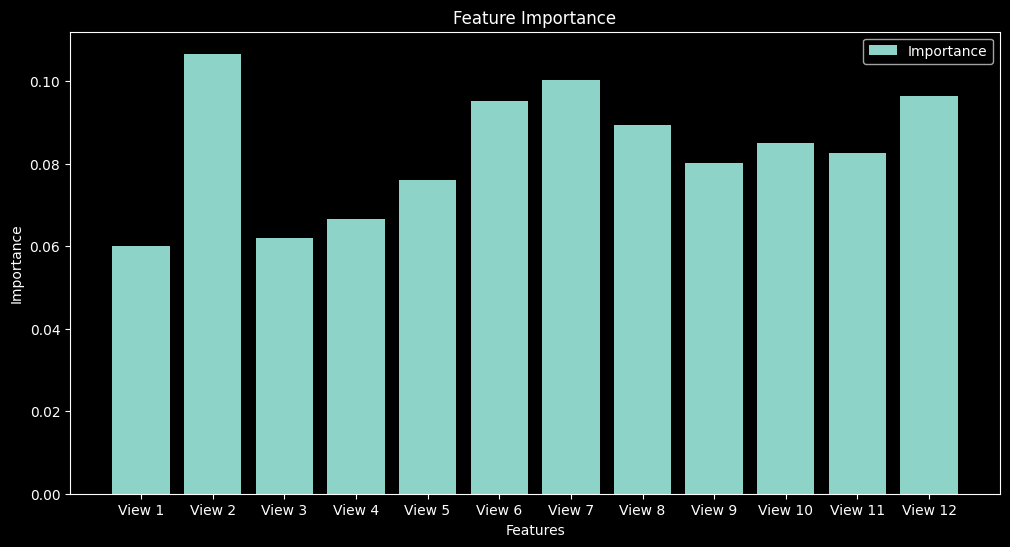

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [14]:
input_data = [[1.0]*12]

In [15]:
model.predict(input_data)

array([0.53156483], dtype=float32)

<Figure size 1000x600 with 0 Axes>

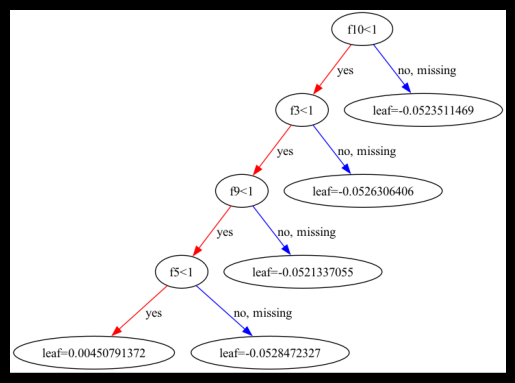

In [16]:
plt.figure(figsize=(10, 6))
plot_tree(model, rankdir='TD')
plt.show()

In [17]:
print("\n".join([model.get_booster().get_dump()[i] for i in range(20)]))

0:[f10<1] yes=1,no=2,missing=2
	1:[f3<1] yes=3,no=4,missing=4
		3:[f9<1] yes=5,no=6,missing=6
			5:[f5<1] yes=7,no=8,missing=8
				7:leaf=0.00450791372
				8:leaf=-0.0528472327
			6:leaf=-0.0521337055
		4:leaf=-0.0526306406
	2:leaf=-0.0523511469

0:[f11<1] yes=1,no=2,missing=2
	1:[f4<1] yes=3,no=4,missing=4
		3:[f8<1] yes=5,no=6,missing=6
			5:[f2<1] yes=7,no=8,missing=8
				7:leaf=0.00448357686
				8:leaf=-0.0522521213
			6:leaf=-0.0516748987
		4:leaf=-0.0524405204
	2:leaf=-0.0538913496

0:[f6<1] yes=1,no=2,missing=2
	1:[f7<1] yes=3,no=4,missing=4
		3:[f3<1] yes=5,no=6,missing=6
			5:[f1<1] yes=7,no=8,missing=8
				7:leaf=0.00417382643
				8:leaf=-0.0515187457
			6:leaf=-0.0471540466
		4:leaf=-0.0516241789
	2:leaf=-0.0519660898

0:[f0<1] yes=1,no=2,missing=2
	1:[f10<1] yes=3,no=4,missing=4
		3:[f4<1] yes=5,no=6,missing=6
			5:[f6<1] yes=7,no=8,missing=8
				7:leaf=0.00403143791
				8:leaf=-0.0469900444
			6:leaf=-0.047242973
		4:leaf=-0.0467717908
	2:leaf=-0.0530083366

0:[f9<1] yes=1

In [18]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)